In [0]:
 !wget --header="Host: zenodo.org" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,pa;q=0.6" --header="Referer: https://zenodo.org/record/1188976" --header="Cookie: session=5bb2e7a3d0f467cc_5d24cf6b.5uXtm3EaYh1sWcmtY-bUae1DXdg; __atuvc=4%7C28; __atuvs=5d25ae68dc9e7c13000; __atrfs=ab/|pos/|tot/|rsi/5d24d0c400000000|cfc/|hash/0|rsiq/|fuid/933364dd|rxi/|rsc/|gen/3|csi/|dr/; _pk_ref.57.a333=%5B%22%22%2C%22%22%2C1562750569%2C%22https%3A%2F%2Fgithub.com%2Frezachu%2Femotion_recognition_cnn%22%5D; _pk_ses.57.a333=*; _pk_id.57.a333=bedb102ff03cbc32.1562693490.3.1562751110.1562750569." --header="Connection: keep-alive" "https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1" -O "Audio_Song_Actors_01-24.zip" -c
 !wget --header="Host: zenodo.org" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,pa;q=0.6" --header="Referer: https://zenodo.org/record/1188976" --header="Cookie: session=5bb2e7a3d0f467cc_5d24cf6b.5uXtm3EaYh1sWcmtY-bUae1DXdg; __atuvc=4%7C28; __atuvs=5d25ae68dc9e7c13000; __atrfs=ab/|pos/|tot/|rsi/5d24d0c400000000|cfc/|hash/0|rsiq/|fuid/933364dd|rxi/|rsc/|gen/3|csi/|dr/; _pk_ref.57.a333=%5B%22%22%2C%22%22%2C1562750569%2C%22https%3A%2F%2Fgithub.com%2Frezachu%2Femotion_recognition_cnn%22%5D; _pk_ses.57.a333=*; _pk_id.57.a333=bedb102ff03cbc32.1562693490.3.1562751128.1562750569." --header="Connection: keep-alive" "https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1" -O "Audio_Speech_Actors_01-24.zip" -c
 !unzip Audio_Song_Actors_01-24.zip -d Data_song
 !unzip Audio_Speech_Actors_01-24.zip -d Data_speech

--2019-07-23 11:17:02--  https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225505317 (215M) [application/octet-stream]
Saving to: ‘Audio_Song_Actors_01-24.zip’

Audio_Song_Actors_0 100%[===================>] 215.06M  22.6MB/s    in 9.6s    

2019-07-23 11:17:12 (22.4 MB/s) - ‘Audio_Song_Actors_01-24.zip’ saved [225505317/225505317]

--2019-07-23 11:17:17--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘Audio_Speech_Actors_01-24.zip’

Audio_Speech_Actors 100%[===================>] 198.81M  25.9MB/s    in 8.6s    

2019-07

In [0]:
import os
song=os.listdir('Data_song')
speech=os.listdir('Data_speech')

In [0]:
import shutil
import os

for i in range(1,10):
  source = 'Data_song/Actor_0'+str(i)+'/'
  dest = 'Data_speech/Actor_0'+str(i)+'/'


  files = os.listdir(source)

  for f in files:
      shutil.move(source+f, dest)
for i in range(10,25):
  source = 'Data_song/Actor_'+str(i)+'/'
  dest = 'Data_speech/Actor_'+str(i)+'/'


  files = os.listdir(source)

  for f in files:
      shutil.move(source+f, dest)      

In [0]:
import os
import random
import sys


import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf



from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3

Using TensorFlow backend.


In [0]:
dir_list = os.listdir('Data_speech/')
dir_list.sort()

data_df = pd.DataFrame(columns=['Path', 'Source', 'Actor', 'Gender',
                                'Intensity', 'Statement', 'Repetition', 'Emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('Data_speech/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = 'Data_speech/' + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [0]:
print (len(data_df))
data_df.head()

2452


,Path,Source,Actor,Gender,Intensity,Statement,Repetition,Emotion
0,Data_speech/Actor_01/03-01-04-01-02-01-01.wav,1,1,male,0,1,0,4
1,Data_speech/Actor_01/03-01-06-02-01-02-01.wav,1,1,male,1,0,1,6
2,Data_speech/Actor_01/03-01-08-02-01-02-01.wav,1,1,male,1,0,1,8
3,Data_speech/Actor_01/03-01-02-01-01-01-01.wav,1,1,male,0,0,0,2
4,Data_speech/Actor_01/03-02-02-01-01-01-01.wav,2,1,male,0,0,0,2


In [0]:
filename = data_df.Path[1021]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

Data_speech/Actor_10/03-01-04-02-02-01-10.wav


(22050, array([2.2842432e-05, 6.2907362e-05, 5.0243121e-05, ..., 2.9766967e-05,
        3.7937814e-05, 0.0000000e+00], dtype=float32))

In [0]:
len(samples), sample_rate

(80931, 22050)

In [0]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [0]:
sample_rate/ len(samples)

0.2724543129332394

**Spectrogram Plotting**

Variation of frequency with seconds

Text(0.5, 0, 'Seconds')

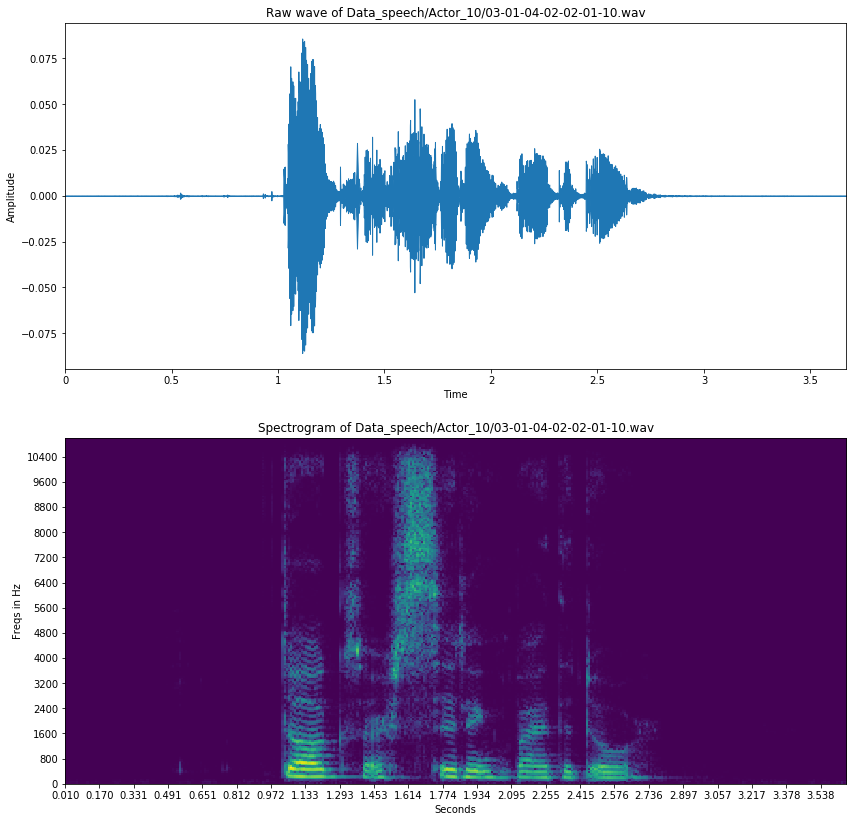

In [0]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [0]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [0]:
# Trim the silence voice
trimmed_audio , index = librosa.effects.trim(samples, top_db=30)
trimmed_audio,index

(array([ 2.2333890e-05, -4.3216555e-06, -1.7841134e-05, ...,
         3.1400676e-04,  3.5547404e-04,  4.5896287e-04], dtype=float32),
 array([22016, 60416]))

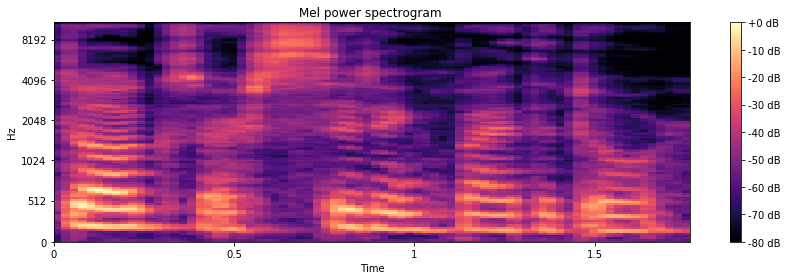

In [0]:
S = librosa.feature.melspectrogram(trimmed_audio, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

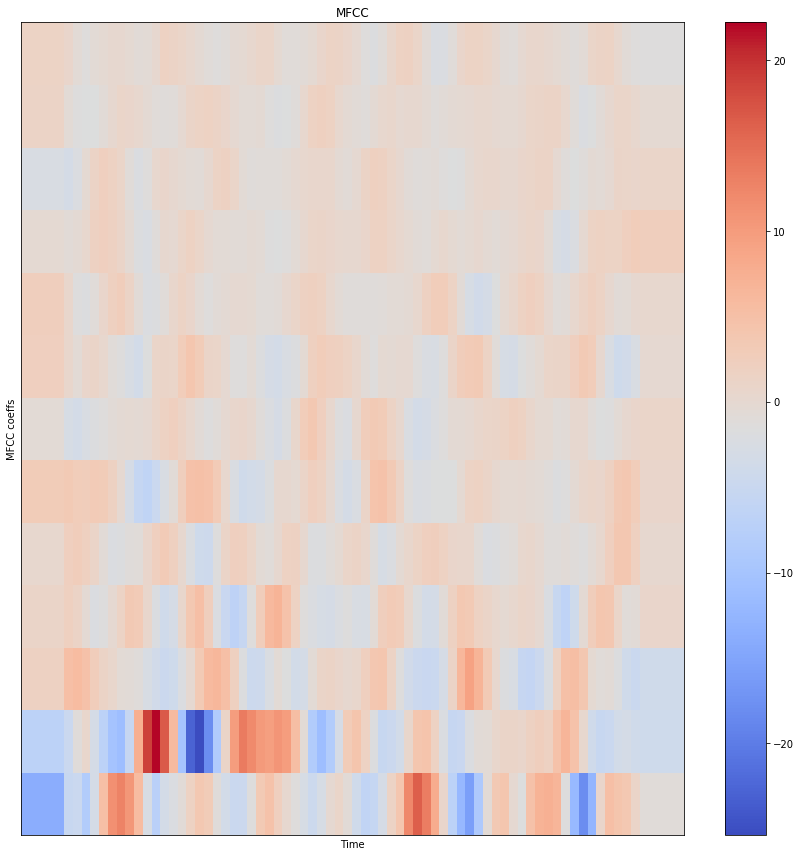

In [0]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 12))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [0]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [0]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(trimmed_audio, rate=sample_rate)

In [0]:
# Silence trimmed Sound by manuel trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

In [0]:
# # 2 class: Positive & Negative

# # Positive: Calm, Happy
# # Negative: Angry, Fearful, Sad

# label2_list = []
# for i in range(len(data_df)):
#     if data_df.Emotion[i] == 2: # Calm
#         lb = "_positive"
#     elif data_df.Emotion[i] == 3: # Happy
#         lb = "_positive"
#     elif data_df.Emotion[i] == 4: # Sad
#         lb = "_negative"
#     elif data_df.Emotion[i] == 5: # Angry
#         lb = "_negative"
#     elif data_df.Emotion[i] == 6: # Fearful
#         lb = "_negative"
#     else:
#         lb = "_none"
        
#     # Add gender to the label    
#     label2_list.append(data_df.Gender[i] + lb)
    
# len(label2_list)

In [0]:
#5 classes
#Calm, Happy , Sad , Angry , Fearful    
# actually there are 8 emotions but we will take only 5 out of them

label5_list=[]
for i in range(data_df.shape[0]):
    if data_df.Emotion[i] == 2: # Calm
        lb = "_Calm"
    elif data_df.Emotion[i] == 3: # Happy
        lb = "_Happy"
    elif data_df.Emotion[i] == 4: # Sad
        lb = "_Sad"
    elif data_df.Emotion[i] == 5: # Angry
        lb = "_Angry"
    elif data_df.Emotion[i] == 6: # Fear
        lb = "_Fear"
    else:
        lb = "_None"
        
    # Add gender to the label    
    label5_list.append(data_df.Gender[i] + lb)
    
len(label5_list)  
  

2452

In [0]:
data_df['label'] = label5_list
data_df.head()

,Path,Source,Actor,Gender,Intensity,Statement,Repetition,Emotion,label
0,Data_speech/Actor_01/03-01-04-01-02-01-01.wav,1,1,male,0,1,0,4,male_Sad
1,Data_speech/Actor_01/03-01-06-02-01-02-01.wav,1,1,male,1,0,1,6,male_Fear
2,Data_speech/Actor_01/03-01-08-02-01-02-01.wav,1,1,male,1,0,1,8,male_None
3,Data_speech/Actor_01/03-01-02-01-01-01-01.wav,1,1,male,0,0,0,2,male_Calm
4,Data_speech/Actor_01/03-02-02-01-01-01-01.wav,2,1,male,0,0,0,2,male_Calm


In [0]:
print (data_df.label.value_counts().keys())

Index(['male_None', 'female_None', 'male_Happy', 'male_Fear', 'male_Calm',
       'male_Angry', 'male_Sad', 'female_Calm', 'female_Angry', 'female_Happy',
       'female_Fear', 'female_Sad'],
      dtype='object')


In [0]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

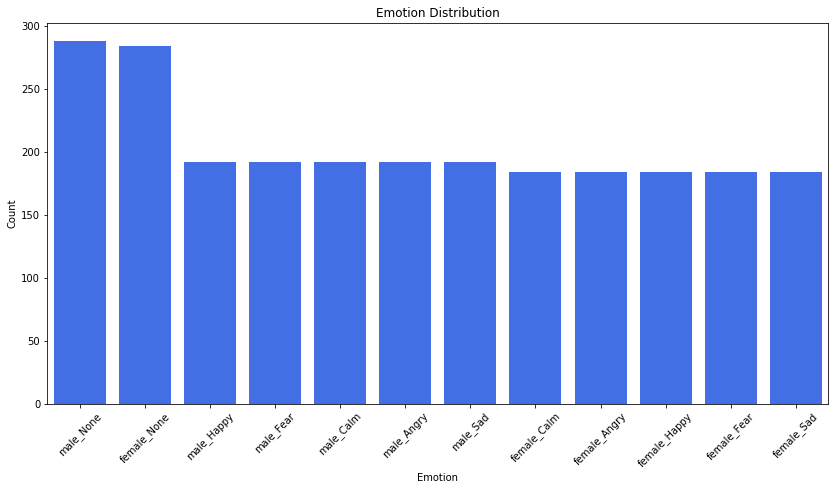

In [0]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

In [0]:
data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_None"]
data2_df = data2_df[data2_df.label != "female_None"].reset_index(drop=True)
# data2_df = data2_df[data2_df.label != "female_Neutral"]
#data2_df = data2_df[data2_df.label != "female_Happy"]
#data2_df = data2_df[data2_df.label != "female_Angry"]
#data2_df = data2_df[data2_df.label != "female_Sad"]
#data2_df = data2_df[data2_df.label != "female_Fearful"]
#data2_df = data2_df[data2_df.label != "female_Calm"]
# data2_df = data2_df[data2_df.label != "female_Positive"]
# data2_df = data2_df[data2_df.label != "female_egative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.Actor == 21]
tmp2 = data2_df[data2_df.Actor == 22]
tmp3 = data2_df[data2_df.Actor == 23]
tmp4 = data2_df[data2_df.Actor == 24]


data3_df = pd.concat([tmp1, tmp2, tmp3, tmp4],ignore_index=True).reset_index(drop=True)


data2_df = data2_df[data2_df.Actor != 21]
data2_df = data2_df[data2_df.Actor != 22]
data2_df = data2_df[data2_df.Actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.Actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head()

1560


,Path,Source,Actor,Gender,Intensity,Statement,Repetition,Emotion,label
0,Data_speech/Actor_01/03-01-04-01-02-01-01.wav,1,1,male,0,1,0,4,male_Sad
1,Data_speech/Actor_01/03-01-06-02-01-02-01.wav,1,1,male,1,0,1,6,male_Fear
2,Data_speech/Actor_01/03-01-02-01-01-01-01.wav,1,1,male,0,0,0,2,male_Calm
3,Data_speech/Actor_01/03-02-02-01-01-01-01.wav,2,1,male,0,0,0,2,male_Calm
4,Data_speech/Actor_01/03-02-06-02-01-02-01.wav,2,1,male,1,0,1,6,male_Fear


In [0]:
pd.unique(data2_df['label']) 

array(['male_Sad', 'male_Fear', 'male_Calm', 'male_Happy', 'male_Angry',
       'female_Angry', 'female_Sad', 'female_Happy', 'female_Fear',
       'female_Calm'], dtype=object)

In [0]:

print (len(data3_df))
data3_df.head()

320


,Path,Source,Actor,Gender,Intensity,Statement,Repetition,Emotion,label
0,Data_speech/Actor_21/03-01-05-01-02-02-21.wav,1,21,male,0,1,1,5,male_Angry
1,Data_speech/Actor_21/03-01-04-02-02-02-21.wav,1,21,male,1,1,1,4,male_Sad
2,Data_speech/Actor_21/03-01-04-01-02-02-21.wav,1,21,male,0,1,1,4,male_Sad
3,Data_speech/Actor_21/03-02-02-02-01-01-21.wav,2,21,male,1,0,0,2,male_Calm
4,Data_speech/Actor_21/03-01-03-01-02-01-21.wav,1,21,male,0,1,0,3,male_Happy


In [0]:
pd.unique(data3_df['label']) 

array(['male_Angry', 'male_Sad', 'male_Calm', 'male_Happy', 'male_Fear',
       'female_Calm', 'female_Sad', 'female_Happy', 'female_Angry',
       'female_Fear'], dtype=object)

In [0]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 1560/1560 [04:44<00:00,  5.41it/s]


In [0]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [0]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-69.484982,-68.489824,-64.986596,-65.037102,...,-70.229631,-69.027566,-66.508143,-69.004429,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631
1,-43.197391,-44.238600,-43.996203,-44.132351,-44.267863,-44.346034,-44.142895,-44.255212,-43.666567,-43.591595,-44.350521,-44.399764,-44.158322,-43.829648,-44.093846,-44.558096,-44.768940,-44.720160,-45.150979,-44.953716,-44.477918,-44.188469,-44.541679,-44.076678,-44.566513,-44.196735,-42.775204,-39.651871,-39.646613,-38.510964,-37.156329,-35.155796,-33.137331,-28.639687,-24.096507,-20.208854,-16.848575,-15.777185,-16.839071,-20.438624,...,-23.869075,-27.399906,-27.543017,-27.825287,-26.374757,-26.433462,-26.809801,-29.282019,-26.990068,-26.587028,-28.645279,-30.838079,-32.098305,-32.290539,-33.849235,-35.313437,-37.186558,-38.559993,-37.166977,-38.283071,-39.934590,-38.492552,-37.710322,-38.639431,-38.270098,-39.254550,-40.667336,-39.336842,-38.503997,-37.974185,-40.030669,-40.667133,-38.647118,-38.187953,-39.104436,-41.083156,-39.765224,-41.423747,-43.453790,-43.185624
2,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-61.326124,-60.893419,-63.767978,-62.977461,-61.404842,-63.950093,-65.938513,-69.175473,-61.678368,-61.514545,-66.917599,-69.971884,-70.267764,-70.267764,-69.274984,-69.495429,-70.267764,-70.102100,-70.267764,-69.902895,-70.267764,-69.916430,-69.471635,-68.002293,-67.983570,-70.267764,-70.267764,-68.205641,-64.099158,-67.300317,-70.267764,-70.267764,-69.957707,-68.377602,-69.862569,-70.267764,-70.122135,-68.554960,-70.206530,-70.267764
3,-61.542955,-61.670297,-61.663520,-61.675594,-59.627474,-58.578270,-60.384651,-60.370816,-59.209070,-59.793678,-60.158085,-60.044346,-60.245425,-60.439403,-60.355395,-59.408090,-58.865264,-59.345201,-61.602433,-61.500546,-61.709822,-61.667639,-60.603727,-58.232912,-60.368184,-59.877874,-61.407462,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-60.927278,-58.844970,-60.013579,...,-32.153746,-33.439365,-33.590846,-32.608751,-32.492997,-33.215966,-32.882555,-33.310935,-32.784035,-31.610842,-31.621681,-32.371180,-33.760162,-33.285419,-33.397925,-33.052248,-33.409399,-34.381166,-34.088725,-33.724742,-33.561447,-35.871615,-35.325334,-34.434048,-34.931488,-36.353946,-36.966679,-37.668084,-39.021492,-39.198411,-41.359175,-40.469880,-41.462666,-40.453254,-42.066735,-42.704448,-41.112258,-41.137339,-41.213322,-38.552507
4,-45.945196,-45.037191,-44.854556,-44.080162,-43.045779,-44.310287,-48.704393,-48.861134,-45.956266,-42.459860,-43.007321,-43.968373,-43.921678,-44.897633,-46.724507,-48.473369,-49

In [0]:
newdf = pd.concat([df3,labels], axis=1)

In [0]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

1560

In [0]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-69.484982,-68.489824,-64.986596,-65.037102,...,-69.027566,-66.508143,-69.004429,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,male_Sad
1,-43.197391,-44.238600,-43.996203,-44.132351,-44.267863,-44.346034,-44.142895,-44.255212,-43.666567,-43.591595,-44.350521,-44.399764,-44.158322,-43.829648,-44.093846,-44.558096,-44.768940,-44.720160,-45.150979,-44.953716,-44.477918,-44.188469,-44.541679,-44.076678,-44.566513,-44.196735,-42.775204,-39.651871,-39.646613,-38.510964,-37.156329,-35.155796,-33.137331,-28.639687,-24.096507,-20.208854,-16.848575,-15.777185,-16.839071,-20.438624,...,-27.399906,-27.543017,-27.825287,-26.374757,-26.433462,-26.809801,-29.282019,-26.990068,-26.587028,-28.645279,-30.838079,-32.098305,-32.290539,-33.849235,-35.313437,-37.186558,-38.559993,-37.166977,-38.283071,-39.934590,-38.492552,-37.710322,-38.639431,-38.270098,-39.254550,-40.667336,-39.336842,-38.503997,-37.974185,-40.030669,-40.667133,-38.647118,-38.187953,-39.104436,-41.083156,-39.765224,-41.423747,-43.453790,-43.185624,male_Fear
2,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-60.893419,-63.767978,-62.977461,-61.404842,-63.950093,-65.938513,-69.175473,-61.678368,-61.514545,-66.917599,-69.971884,-70.267764,-70.267764,-69.274984,-69.495429,-70.267764,-70.102100,-70.267764,-69.902895,-70.267764,-69.916430,-69.471635,-68.002293,-67.983570,-70.267764,-70.267764,-68.205641,-64.099158,-67.300317,-70.267764,-70.267764,-69.957707,-68.377602,-69.862569,-70.267764,-70.122135,-68.554960,-70.206530,-70.267764,male_Calm
3,-61.542955,-61.670297,-61.663520,-61.675594,-59.627474,-58.578270,-60.384651,-60.370816,-59.209070,-59.793678,-60.158085,-60.044346,-60.245425,-60.439403,-60.355395,-59.408090,-58.865264,-59.345201,-61.602433,-61.500546,-61.709822,-61.667639,-60.603727,-58.232912,-60.368184,-59.877874,-61.407462,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-60.927278,-58.844970,-60.013579,...,-33.439365,-33.590846,-32.608751,-32.492997,-33.215966,-32.882555,-33.310935,-32.784035,-31.610842,-31.621681,-32.371180,-33.760162,-33.285419,-33.397925,-33.052248,-33.409399,-34.381166,-34.088725,-33.724742,-33.561447,-35.871615,-35.325334,-34.434048,-34.931488,-36.353946,-36.966679,-37.668084,-39.021492,-39.198411,-41.359175,-40.469880,-41.462666,-40.453254,-42.066735,-42.704448,-41.112258,-41.137339,-41.213322,-38.552507,male_Calm
4,-45.945196,-45.037191,-44.854556,-44.080162,-43.045779,-44.310287,-48.704393,-48.861134,-45.956266,-42.459860,-43.007321,-43.968373,-43.921678,-44.897633,-46.724507,-48.473369,-49.12

In [0]:
rnewdf.isnull().sum().sum()

2781

In [0]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-69.484982,-68.489824,-64.986596,-65.037102,...,-69.027566,-66.508143,-69.004429,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,male_Sad
1,-43.197391,-44.238600,-43.996203,-44.132351,-44.267863,-44.346034,-44.142895,-44.255212,-43.666567,-43.591595,-44.350521,-44.399764,-44.158322,-43.829648,-44.093846,-44.558096,-44.768940,-44.720160,-45.150979,-44.953716,-44.477918,-44.188469,-44.541679,-44.076678,-44.566513,-44.196735,-42.775204,-39.651871,-39.646613,-38.510964,-37.156329,-35.155796,-33.137331,-28.639687,-24.096507,-20.208854,-16.848575,-15.777185,-16.839071,-20.438624,...,-27.399906,-27.543017,-27.825287,-26.374757,-26.433462,-26.809801,-29.282019,-26.990068,-26.587028,-28.645279,-30.838079,-32.098305,-32.290539,-33.849235,-35.313437,-37.186558,-38.559993,-37.166977,-38.283071,-39.934590,-38.492552,-37.710322,-38.639431,-38.270098,-39.254550,-40.667336,-39.336842,-38.503997,-37.974185,-40.030669,-40.667133,-38.647118,-38.187953,-39.104436,-41.083156,-39.765224,-41.423747,-43.453790,-43.185624,male_Fear
2,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-60.893419,-63.767978,-62.977461,-61.404842,-63.950093,-65.938513,-69.175473,-61.678368,-61.514545,-66.917599,-69.971884,-70.267764,-70.267764,-69.274984,-69.495429,-70.267764,-70.102100,-70.267764,-69.902895,-70.267764,-69.916430,-69.471635,-68.002293,-67.983570,-70.267764,-70.267764,-68.205641,-64.099158,-67.300317,-70.267764,-70.267764,-69.957707,-68.377602,-69.862569,-70.267764,-70.122135,-68.554960,-70.206530,-70.267764,male_Calm
3,-61.542955,-61.670297,-61.663520,-61.675594,-59.627474,-58.578270,-60.384651,-60.370816,-59.209070,-59.793678,-60.158085,-60.044346,-60.245425,-60.439403,-60.355395,-59.408090,-58.865264,-59.345201,-61.602433,-61.500546,-61.709822,-61.667639,-60.603727,-58.232912,-60.368184,-59.877874,-61.407462,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-60.927278,-58.844970,-60.013579,...,-33.439365,-33.590846,-32.608751,-32.492997,-33.215966,-32.882555,-33.310935,-32.784035,-31.610842,-31.621681,-32.371180,-33.760162,-33.285419,-33.397925,-33.052248,-33.409399,-34.381166,-34.088725,-33.724742,-33.561447,-35.871615,-35.325334,-34.434048,-34.931488,-36.353946,-36.966679,-37.668084,-39.021492,-39.198411,-41.359175,-40.469880,-41.462666,-40.453254,-42.066735,-42.704448,-41.112258,-41.137339,-41.213322,-38.552507,male_Calm
4,-45.945196,-45.037191,-44.854556,-44.080162,-43.045779,-44.310287,-48.704393,-48.861134,-45.956266,-42.459860,-43.007321,-43.968373,-43.921678,-44.897633,-46.724507,-48.473369,-49.12

In [0]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

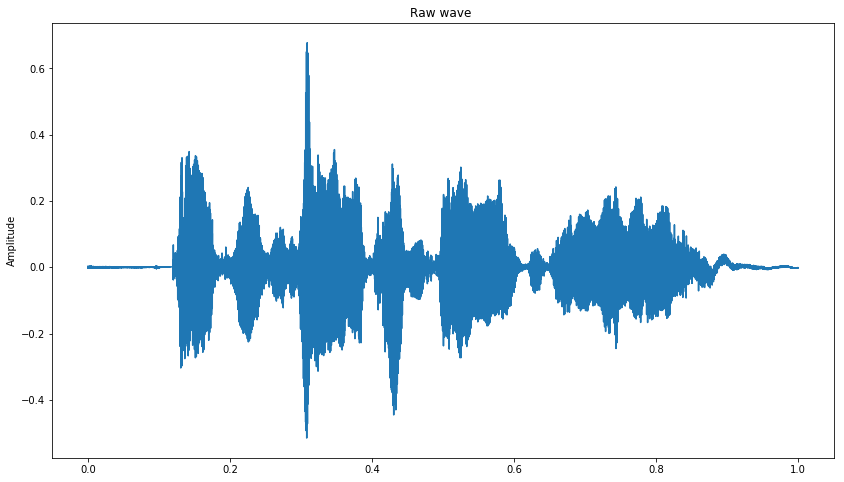

In [0]:
X, sample_rate = librosa.load(data2_df.Path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

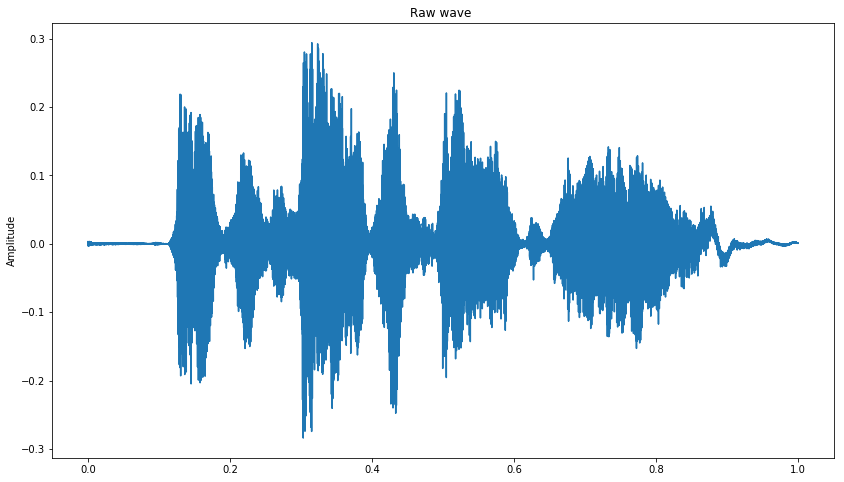

In [0]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [0]:
# Augmentation Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 1560/1560 [07:19<00:00,  3.54it/s]


In [0]:
# Augmentation Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 1560/1560 [13:19<00:00,  1.91it/s]


In [0]:
len(syn_data1), len(syn_data2)

(1560, 1560)

In [0]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [0]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

1560

In [0]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-62.214526,-58.307363,-55.270493,-55.487019,-57.530020,-55.018305,-56.258940,-55.341890,-56.776891,-55.333909,-56.405986,-55.810638,-55.847938,-55.868274,-57.160321,-58.038438,-55.373955,-54.544562,-55.181344,-56.379029,-56.042658,-55.352149,-56.327275,-55.680262,-54.185876,-55.005465,-55.518731,-54.644114,-55.654734,-57.697196,-55.038653,-55.994140,-56.432894,-55.928403,-56.200383,-55.784859,-55.873151,-54.431685,-54.942265,-56.963511,...,-55.006108,-57.049277,-55.695852,-56.768430,-58.257270,-59.311651,-59.583982,-57.486519,-58.123791,-58.074366,-57.447203,-57.916693,-56.030218,-57.734920,-55.809712,-53.604548,-55.730239,-56.364033,-57.044011,-56.678787,-56.000835,-55.915235,-57.463603,-57.484583,-55.024280,-54.751501,-55.067433,-52.907661,-54.837388,-57.515491,-56.272580,-54.945513,-55.082904,-55.422646,-59.027318,-58.453074,-55.176053,-55.030224,-57.917073,male_Sad
1,-39.894757,-38.849902,-36.900948,-36.237430,-36.218398,-37.855824,-39.438911,-37.830955,-35.046992,-37.072205,-39.460237,-38.666523,-37.075877,-38.607275,-39.374901,-38.589366,-38.154258,-36.447318,-36.415691,-35.016576,-37.054522,-37.556890,-37.314857,-36.414001,-36.794747,-37.028770,-36.467350,-35.443900,-35.450284,-36.364485,-33.404797,-33.171930,-31.578572,-27.523400,-23.548547,-20.078084,-16.495355,-15.488361,-16.675900,-20.346738,...,-26.939676,-25.488517,-26.419527,-25.836182,-25.546731,-25.790606,-27.999260,-26.645259,-26.189991,-27.346608,-29.924257,-32.221468,-31.612423,-31.589029,-33.576448,-35.732852,-34.931537,-34.586594,-34.740740,-36.415404,-35.439782,-33.356598,-35.644562,-35.663650,-35.027811,-35.299331,-32.287544,-34.463080,-35.357930,-34.824345,-35.961940,-36.666298,-36.637335,-35.881103,-39.155725,-37.973386,-37.182456,-38.127619,-35.046991,male_Fear
2,-57.562253,-58.019490,-56.932948,-58.429880,-60.060071,-58.377369,-56.816364,-55.888440,-58.924367,-59.806315,-62.465010,-60.172750,-59.974871,-59.931874,-57.883537,-57.640251,-57.112326,-56.559249,-58.577525,-58.162660,-58.418771,-55.992393,-58.198512,-58.861082,-56.325014,-58.271464,-58.117689,-56.101707,-57.414888,-59.160594,-60.267888,-59.055077,-56.963560,-58.978399,-59.767223,-57.467031,-57.281395,-57.455349,-57.084645,-58.874470,...,-54.125054,-56.811056,-55.726492,-54.815199,-57.061577,-57.679122,-57.908843,-55.601174,-55.601441,-56.447268,-58.570725,-58.439576,-59.851644,-59.773183,-61.398825,-59.450521,-59.986630,-60.189682,-60.033110,-59.468781,-58.716322,-59.297692,-59.596470,-59.495789,-58.960944,-58.077375,-57.426531,-57.722856,-58.020069,-60.840760,-60.694261,-57.397781,-58.320660,-60.444335,-62.089616,-60.409205,-57.320083,-57.495347,-59.175381,male_Calm
3,-58.699856,-58.197690,-60.407049,-61.073291,-58.992293,-57.330829,-57.559225,-55.916312,-56.030487,-58.385717,-59.089162,-59.436319,-59.593390,-58.580398,-59.079266,-56.991310,-56.093713,-58.198045,-61.068337,-60.331345,-60.496552,-60.613967,-58.372863,-56.534139,-58.640031,-58.009813,-59.470822,-59.941838,-60.514725,-60.210747,-59.620258,-59.579893,-60.900402,-61.193893,-61.082276,-60.879369,-59.310658,-58.009990,-55.958637,-55.460953,...,-33.775518,-33.056132,-31.947263,-32.531499,-33.241781,-32.762380,-33.149476,-32.886614,-31.706802,-31.408034,-31.999539,-33.339994,-33.295918,-33.616076,-33.274491,-33.483568,-34.500676,-33.986485,-33.844313,-33.554459,-35.474072,-35.748908,-34.541098,-34.514408,-35.868411,-36.680911,-37.124233,-38.100566,-38.870990,-41.769712,-40.128482,-41.174989,-40.201460,-41.746068,-42.179140,-40.874143,-40.985367,-41.060764,-38.496311,male_Calm
4,-39.174784,-37.757505,-38.116564,-37.532887,-38.960818,-38.516344,-38.057711,-39.129184,-37.807580,-36.340711,-36.630897,-35.739595,-34.169795,-37.447773,-40.644511,-38.105443,-36.63

In [0]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

1560

In [0]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.056827,-76.416361,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-75.668315,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-74.136017,-73.353518,-71.614323,-70.928217,-67.560039,...,-73.349183,-70.902173,-72.784643,-75.449971,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,-76.574990,male_Sad
1,-43.662617,-46.382572,-48.664697,-48.318520,-48.052508,-48.099192,-47.998006,-48.406444,-48.282583,-48.853497,-49.159923,-49.464517,-48.606609,-48.352823,-48.560482,-48.965967,-49.501637,-49.777022,-49.685675,-50.006763,-49.339820,-49.238047,-48.740148,-48.658948,-47.852366,-46.586662,-44.651820,-43.018724,-40.741755,-39.373609,-39.635345,-37.264744,-33.253765,-29.489897,-24.393946,-22.894536,-20.385692,-18.843692,-20.115079,-24.318093,...,-33.640360,-35.596614,-33.608030,-32.638700,-33.328815,-34.012650,-34.689677,-34.725199,-35.534121,-36.242386,-38.150433,-38.635344,-40.043696,-39.833014,-40.180913,-41.786461,-43.196643,-41.990592,-42.598454,-43.590375,-43.850472,-44.865873,-43.021264,-42.444923,-44.514816,-44.197347,-43.969575,-42.304577,-42.448740,-45.387047,-45.181483,-44.156086,-44.172021,-43.893935,-43.893114,-44.093125,-43.753357,-47.371003,-48.635675,male_Fear
2,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-72.474106,-71.860075,-72.173767,-72.393358,-72.479969,-72.138167,-72.503774,-72.078051,-71.376390,-72.651975,-72.062680,-72.178333,-72.388450,-72.215528,-71.872390,-70.740995,-71.049441,-70.194276,-69.595630,-67.119605,-67.685691,-70.094775,...,-70.938440,-69.978410,-66.623951,-66.810365,-69.895659,-69.993103,-70.021167,-66.459722,-64.531651,-68.318992,-71.977332,-72.474106,-72.474106,-71.944232,-72.297736,-72.474106,-72.474106,-72.474106,-72.474106,-72.051289,-72.069200,-71.524024,-71.268908,-71.219247,-72.039298,-72.433426,-70.260129,-68.213651,-70.049784,-72.474106,-72.474106,-72.126819,-71.965379,-72.380460,-72.468721,-72.192156,-71.665087,-72.474106,-72.474106,male_Calm
3,-63.585348,-63.902131,-64.111583,-63.474728,-61.882727,-61.876381,-61.645409,-61.894933,-61.662424,-62.489717,-62.365707,-62.282686,-62.904892,-63.187350,-62.028245,-61.003050,-60.414768,-63.127784,-64.442215,-64.187592,-64.180876,-63.878927,-61.483694,-61.191923,-61.709289,-63.334434,-63.362137,-64.115522,-64.115522,-64.115522,-64.115522,-64.115522,-64.115522,-64.115522,-64.115522,-64.115522,-64.038975,-63.076610,-62.970975,-61.799544,...,-31.898331,-32.833347,-33.022969,-33.577014,-33.221281,-33.185279,-33.187016,-33.296099,-33.393141,-33.392409,-33.202249,-33.997854,-36.145527,-36.908994,-36.583426,-37.825060,-37.979950,-37.484663,-37.318773,-36.019641,-36.911917,-36.905741,-37.101780,-37.416350,-38.921623,-39.725782,-39.932496,-41.148717,-43.032718,-45.222424,-45.510588,-46.938381,-48.479027,-48.769439,-47.823316,-46.020676,-45.508781,-43.436756,-41.591545,male_Calm
4,-46.999759,-46.202522,-45.473912,-44.776609,-46.584361,-48.251809,-49.263368,-50.972011,-49.251528,-46.312613,-45.448095,-46.136510,-46.338020,-46.182691,-47.844413,-49.572837,-51.06

In [0]:
# Combining the Augmented data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-69.484982,-68.489824,-64.986596,-65.037102,...,-69.027566,-66.508143,-69.004429,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,-70.229631,male_Sad
1,-43.197391,-44.238600,-43.996203,-44.132351,-44.267863,-44.346034,-44.142895,-44.255212,-43.666567,-43.591595,-44.350521,-44.399764,-44.158322,-43.829648,-44.093846,-44.558096,-44.768940,-44.720160,-45.150979,-44.953716,-44.477918,-44.188469,-44.541679,-44.076678,-44.566513,-44.196735,-42.775204,-39.651871,-39.646613,-38.510964,-37.156329,-35.155796,-33.137331,-28.639687,-24.096507,-20.208854,-16.848575,-15.777185,-16.839071,-20.438624,...,-27.399906,-27.543017,-27.825287,-26.374757,-26.433462,-26.809801,-29.282019,-26.990068,-26.587028,-28.645279,-30.838079,-32.098305,-32.290539,-33.849235,-35.313437,-37.186558,-38.559993,-37.166977,-38.283071,-39.934590,-38.492552,-37.710322,-38.639431,-38.270098,-39.254550,-40.667336,-39.336842,-38.503997,-37.974185,-40.030669,-40.667133,-38.647118,-38.187953,-39.104436,-41.083156,-39.765224,-41.423747,-43.453790,-43.185624,male_Fear
2,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-60.893419,-63.767978,-62.977461,-61.404842,-63.950093,-65.938513,-69.175473,-61.678368,-61.514545,-66.917599,-69.971884,-70.267764,-70.267764,-69.274984,-69.495429,-70.267764,-70.102100,-70.267764,-69.902895,-70.267764,-69.916430,-69.471635,-68.002293,-67.983570,-70.267764,-70.267764,-68.205641,-64.099158,-67.300317,-70.267764,-70.267764,-69.957707,-68.377602,-69.862569,-70.267764,-70.122135,-68.554960,-70.206530,-70.267764,male_Calm
3,-61.542955,-61.670297,-61.663520,-61.675594,-59.627474,-58.578270,-60.384651,-60.370816,-59.209070,-59.793678,-60.158085,-60.044346,-60.245425,-60.439403,-60.355395,-59.408090,-58.865264,-59.345201,-61.602433,-61.500546,-61.709822,-61.667639,-60.603727,-58.232912,-60.368184,-59.877874,-61.407462,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-61.675594,-60.927278,-58.844970,-60.013579,...,-33.439365,-33.590846,-32.608751,-32.492997,-33.215966,-32.882555,-33.310935,-32.784035,-31.610842,-31.621681,-32.371180,-33.760162,-33.285419,-33.397925,-33.052248,-33.409399,-34.381166,-34.088725,-33.724742,-33.561447,-35.871615,-35.325334,-34.434048,-34.931488,-36.353946,-36.966679,-37.668084,-39.021492,-39.198411,-41.359175,-40.469880,-41.462666,-40.453254,-42.066735,-42.704448,-41.112258,-41.137339,-41.213322,-38.552507,male_Calm
4,-45.945196,-45.037191,-44.854556,-44.080162,-43.045779,-44.310287,-48.704393,-48.861134,-45.956266,-42.459860,-43.007321,-43.968373,-43.921678,-44.897633,-46.724507,-48.473369,-49.12

In [0]:

#  Stratified Shuffle Split

X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [0]:
y_train.value_counts()

male_Happy      384
male_Calm       384
male_Angry      384
male_Sad        384
male_Fear       384
female_Calm     365
female_Angry    365
female_Fear     365
female_Sad      365
female_Happy    364
Name: label, dtype: int64

In [0]:
y_test.value_counts()

male_Angry      96
male_Sad        96
male_Happy      96
male_Fear       96
male_Calm       96
female_Happy    92
female_Calm     91
female_Angry    91
female_Fear     91
female_Sad      91
Name: label, dtype: int64

In [0]:
X_train.isna().sum().sum()

0

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
X_train.shape

(3744, 259)

In [0]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [0]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [0]:
print('Hello')

Hello


In [0]:
import warnings
warnings.filterwarnings('ignore')
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
# Edit according to target class no.
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

W0723 11:39:15.741697 140625133197184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 11:39:15.790388 140625133197184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 11:39:15.799062 140625133197184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 11:39:15.967239 140625133197184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 11:39:16.004531 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 259, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 259, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 259, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 259, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 259, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 259, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 256)           0         
__________

In [0]:
warnings.filterwarnings('ignore')
# Compile your model


model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])

W0723 11:39:16.372097 140625133197184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 11:39:16.388477 140625133197184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
!mkdir model/

In [0]:
# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('model/5Classes.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=350,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce, es])

W0723 11:39:31.792665 140625133197184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3744 samples, validate on 936 samples
Epoch 1/350
3744/3744 [==============================] - 14s 4ms/step - loss: 2.1717 - acc: 0.1958 - fscore: 0.0000e+00 - val_loss: 2.0879 - val_acc: 0.2308 - val_fscore: 0.0000e+00
Epoch 2/350
3744/3744 [==============================] - 7s 2ms/step - loss: 1.9642 - acc: 0.2631 - fscore: 0.0035 - val_loss: 2.0142 - val_acc: 0.2778 - val_fscore: 0.0000e+00
Epoch 3/350
3744/3744 [==============================] - 7s 2ms/step - loss: 1.8727 - acc: 0.2999 - fscore: 0.0160 - val_loss: 1.9437 - val_acc: 0.3013 - val_fscore: 0.0000e+00
Epoch 4/350
3744/3744 [==============================] - 7s 2ms/step - loss: 1.8144 - acc: 0.3301 - fscore: 0.0260 - val_loss: 1.8857 - val_acc: 0.3419 - val_fscore: 0.0000e+00
Epoch 5/350
3744/3744 [==============================] - 7s 2ms/step - loss: 1.7718 - acc: 0.3563 - fscore: 0.0317 - val_loss: 1.8637 - val_acc: 0.3558 - val_fscore: 0.0000e+00
Epoch 6/350
3744/3744 [==============================] - 7s 2ms

- Now we will have two files : model.json   and model/5Classes.h5  
- Download them

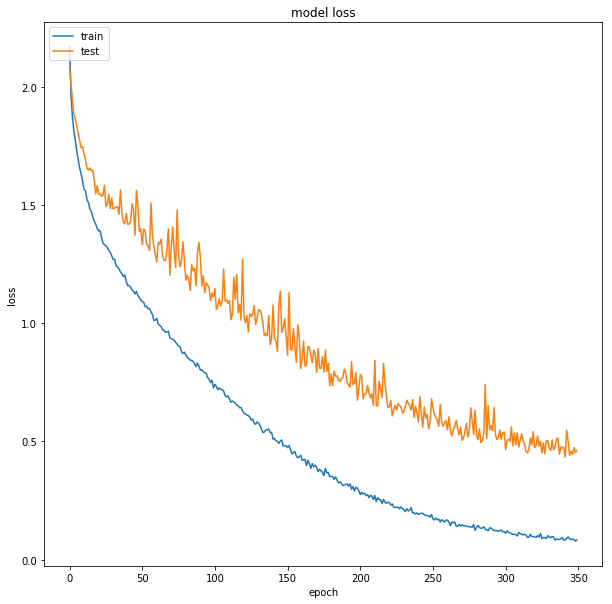

In [0]:
# Plotting the Train Valid Loss Graph
plt.figure(figsize=(10,10))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Saving the model.json, it will be useful to load model and load.

import json
model_json = model.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model5.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model/5Classes.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 86.54%


In [0]:
len(data3_df)

320

In [0]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data3_df))):
    X, sample_rate = librosa.load(data3_df.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data3_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 320/320 [01:29<00:00,  3.59it/s]


In [0]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

320/320 [==============================] - 0s 2ms/step


In [0]:
preds.shape

(320, 10)

In [0]:
preds_=np.argmax(preds,axis=1)   #finding the label having max probability 

In [0]:
preds_label2=lb.inverse_transform(preds_)
preds_[-10:]

array([2, 0, 0, 1, 3, 0, 2, 1, 0, 1])

In [0]:
label_dict={8:'male_Happy',7:'male_Fear',6:'male_Calm',9:'male_Sad',5:'male_Angry',1:'female_Calm',3:'female_Happy',2:'female_Fear',0:'female_Angry',4:'female_Sad'}

**CODE to check output for arbitrary file.**

Just provide full filepath

In [0]:
def predict4voice(filepath):
  audio_series, sample_rate = librosa.load(filepath, res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#   sample_rate = np.array(sample_rate
  mfccs = np.mean(librosa.feature.mfcc(y=audio_series, sr=sample_rate, n_mfcc=13), axis=0)
  feature = mfccs.reshape(259,1)
  feature=np.expand_dims(feature,axis=0)
  print()

  return audio_series,sample_rate,lb.inverse_transform(loaded_model.predict_classes(feature))[0],loaded_model.predict_proba(feature)[0]


The predicted label for Data_speech/Actor_21/03-01-05-01-01-02-21.wav is male_Happy


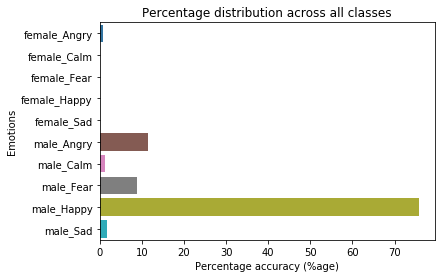

In [0]:
filepath='Data_speech/Actor_21/03-01-05-01-01-02-21.wav'
audio_series,sample_rate,prediction,probabilities = predict4voice(filepath)

print('The predicted label for {} is {}'.format(filepath,prediction))

import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(list(probabilities*100),[label_dict[i] for i in range(10)])
plt.xlabel('Percentage accuracy (%age)')
plt.ylabel('Emotions')
plt.title('Percentage distribution across all classes')


ipd.Audio(audio_series, rate=sample_rate)
